# 计算两个椭圆的交点

In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import sympy as sy
sy.init_printing()

## 椭圆的参数方程

椭圆可以用如下的参数方程表示，其中$a$为长轴的长度，$b$为短轴长度，$(x_c, y_c)$为椭圆的中心坐标，$\theta$为椭圆长轴和X轴的夹角，$t$为参变量，$(x(t),y(t))$为椭圆上各点的坐标：

$x(t)=x_c + a\,\cos t\,\cos \theta - b\,\sin t\,\sin\theta$

$y(t)=y_c + a\,\cos t\,\sin \theta + b\,\sin t\,\cos\theta$

下面是用参数方程计算椭圆上各点，并绘图的函数：

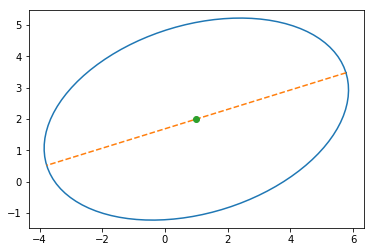

In [2]:
def ellipse(e, t):
    from numpy import cos, sin
    a, b, x_c, y_c, theta = e
    ct, st, cth, sth = cos(t), sin(t), cos(theta), sin(theta)
    x = a*ct*cth - b*st*sth + x_c
    y = a*sth*ct + b*st*cth + y_c
    return x, y

def plot_ellipse(e):
    t = np.linspace(0, np.pi*2, 100)
    x, y = ellipse(e, t)
    pl.plot(x, y)    
    
e1 = (5.0, 3.0, 1.0, 2.0, 0.3)
plot_ellipse(e1)
x, y = ellipse(e1, [0, np.pi])
pl.plot(x, y, "--")
pl.plot(x.mean(), y.mean(), "o")
pl.axis("equal");

## 椭圆的隐函数方程

标准椭圆的隐函数方程为：

$\frac{x^2}{a^2}+\frac{y^2}{b^2}=1$

为了计算任意椭圆的的隐函数方程，需要进行旋转和平移两种坐标变换。假设$(x', y')$为任意椭圆上的一点，它和标准椭圆上的点$(x, y)$之间有如下关系：

$$ \begin{bmatrix} x' \\
y' \\ \end{bmatrix} = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \\ \end{bmatrix}\begin{bmatrix} x \\ y \\ \end{bmatrix} + \begin{bmatrix} x_c \\ y_c \\ \end{bmatrix}$$

其中$\begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \\ \end{bmatrix}$为旋转矩阵，它将点$(x, y)$绕坐标原点旋转角度$\theta$。将上面的公式进行变换，得到：

$ \begin{bmatrix} x \\ y \\ \end{bmatrix} = \begin{bmatrix} \cos \theta & \sin \theta \\ -\sin \theta & \cos \theta \\ \end{bmatrix}\begin{bmatrix} x'-x_c \\ y'-y_c \\ \end{bmatrix}$

将$(x, y)$带入到标准隐函数方程就可以得到$(x', y')$的隐函数方程。下面我们用SymPy来完成这个计算。


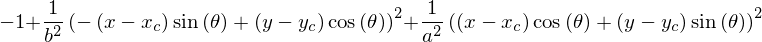

In [3]:
x, y, theta, xc, yc, a, b = sy.symbols("x y theta x_c y_c a b", real=True)
M = sy.Matrix([[sy.cos(theta),  sy.sin(theta)],
               [-sy.sin(theta), sy.cos(theta)]])
P = sy.Matrix([[x-xc],[y-yc]])
P2 = M * P
eq = (x/a)**2 + (y/b)**2 - 1
eq2 = eq.subs({x:P2[0], y:P2[1]}, simultaneous=True)
eq2

隐函数方程的曲线可以通过等值线函数`contour()`绘制：

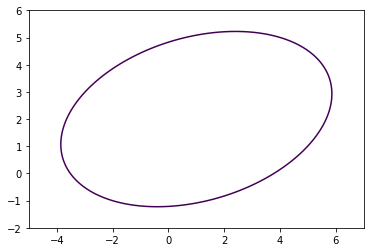

In [4]:
def implicit_ellipse(e, x, y):
    from numpy import cos, sin
    a, b, x_c, y_c, theta = e    
    return (-1 + (-(x - x_c)*sin(theta) + (y - y_c)*cos(theta))**2/b**2 + 
            ((x - x_c)*cos(theta) + (y - y_c)*sin(theta))**2/a**2)

yg, xg = np.mgrid[-2:6:100j, -5:7:100j]
zg = implicit_ellipse(e1, xg, yg)

pl.contour(xg, yg, zg, levels=[0]);

## 计算两个椭圆的交点

两个任意椭圆的交点可以通过如下步骤进行计算：

1. 将椭圆1用隐函数方程表示。由于椭圆是一个二阶曲线，它的隐函数方程的一般形式为：$A x^2 + B x y + C y^2 + D x + E y + F = 0$

2. 将椭圆2的参数方程形式：$x = f(t), y = g(t)$代入到上面的隐函数方程中，得到一个关于$sin(t), cos(t)$的二阶方程。

3. 将上述方程中的$\cos{t}$替换为$c_t$，$\sin{t}$替换为$\sqrt{1-c_t^2}$，并通过一些变换将其转换成一个关于$c_t$的一元四次方程。

4. 求解上述方程，对$c_t$在-1到1之间的实数解，求反余弦：$t = \pm \arccos{c_t}$。

5. 将$t$的值代入到参数方程中得到椭圆2上的一点$(x_t, y_t)$，并验证$(x_t, y_t)$是否满足椭圆1的隐函数方程。满足的点就为交点。

由上面的步骤可以看出，其中涉及到许多符号表达式变换。通过SymPy的符号运算功能，可以帮助我们简化程序的编写。

### 计算隐函数方程的系数

首先让SymPy帮我们计算隐函数方程的一般形式中的那些系数：$A, B, C, D, E, F$. 通过`as_poly()`方法可以将一个表达式转换成多项式对象，然后通过多项式对象的`coeffs()`方法可以获得其各项的系数。多元多项式的系数排列可以有很多种方式，这里使用"grlex"排列，它是按照阶数、未知数的字母顺序排列，其结果和步骤1中的一般形式的顺序相同。

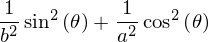

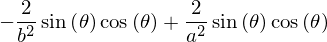

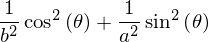

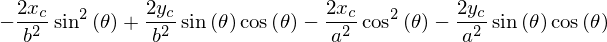

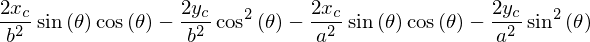

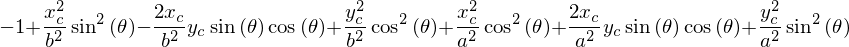

In [5]:
from IPython.display import display
p = eq2.as_poly(x, y)
for coef in p.coeffs(order="grlex"):
    display(coef)

我们可以直接将上述结果复制到一个Python函数中，不过仔细观察各项系数，可以发现它们有许多相同的子项，这样会造成许多不必要的重复计算。我们可以使用`cse()`将一个复杂的表达式分成多步进行计算。下面先看一个简单的例子。

对于为了计算`P2`中的两个表达式，可以先计算四个临时变量$x_0, x_1, x_2, x_3$，然后`P2`的就可以简化为$x_0 x_3 + x_1 x_2, -x_0 x_1 + x_2 x_3$。这样就避免了$x-x_c$等子项的重复运算。

`cse(expression)`将`expression`中的公共子项提取出来用临时变量表示，返回一个二元元组，其中第一个元素为一个列表，列表中的每个元素对应一个临时变量的表达式；元组的第二个元素为采用各个临时变量比表示的原表达式。

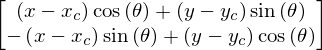

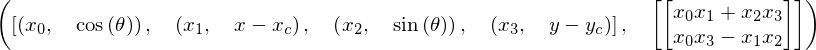

In [6]:
display(P2)
sy.cse(P2)

下面的两个函数可以将`cse()`得到结果转换成一个Python函数，用于数值运算。在后续的程序中生成的cse中会出现`Eq`和`Piecewise`函数。这里使用自定义`PythoPrinter`类将上述两个函数分别输出为等于操作符和调用`_piecewise_func()`函数。

In [7]:
from sympy.printing import StrPrinter

def _piecewise_func(*args):
    for expr, cond in args:
        if cond:
            return expr

class PythonPrinter(StrPrinter):
    def _print_Equality(self, expr):
        return "{} == {}".format(self._print(expr.lhs), self._print(expr.rhs))
    
    def _print_Piecewise(self, expr):
        return "_piecewise_func({})".format(", ".join(self._print(arg) for arg in expr.args))
    
cse2func_history = {}

def cse2func(funcname, precodes, seq, printer_class=PythonPrinter):
    import textwrap
    printer = printer_class()
    codes = ["def %s:" % funcname]
    if isinstance(precodes, str):
        precodes = [precodes]
    for line in precodes:
        codes.append("    %s" % line)
    for variable, value in seq[0]:
        codes.append("    %s = %s" % (variable, printer._print(value)))
    returns = "    return (%s)" % ", ".join([printer._print(value) for value in seq[1]])
    codes.append("\n".join(textwrap.wrap(returns, 80)))
    code = "\n".join(codes)
    get_ipython().run_code(code)
    cse2func_history[funcname] = code
    return code

下面我们用`cse2func()`得到计算椭圆的隐函数方程系数的函数`ellipse_equation()`:

In [8]:
seq = sy.cse(p.coeffs(order="grlex"))
code = cse2func("ellipse_equation(a, b, x_c, y_c, theta)", "from math import sin, cos", seq)
print(code)

def ellipse_equation(a, b, x_c, y_c, theta):
    from math import sin, cos
    x0 = a**(-2)
    x1 = cos(theta)
    x2 = x1**2
    x3 = x0*x2
    x4 = b**(-2)
    x5 = sin(theta)
    x6 = x5**2
    x7 = x4*x6
    x8 = 2*x1*x5
    x9 = x0*x8
    x10 = x4*x8
    x11 = x0*x6
    x12 = x2*x4
    x13 = 2*x_c
    x14 = 2*y_c
    x15 = x9*x_c
    x16 = x10*x_c
    x17 = x_c**2
    x18 = y_c**2
    return (x3 + x7, -x10 + x9, x11 + x12, x10*y_c - x13*x3 - x13*x7 - x9*y_c,
-x11*x14 - x12*x14 - x15 + x16, x11*x18 + x12*x18 + x15*y_c - x16*y_c + x17*x3 +
x17*x7 - 1)


下面是前面的椭圆e1的隐函数方程中各项的系数：

In [9]:
print(ellipse_equation(*e1))

(0.04621028924765588, -0.040152353663646945, 0.10490082186345522, -0.012115871168017864, -0.3794509337901739, -0.6144911306258172)


### 交点的一元四阶方程的系数

首先参数方程：

In [10]:
theta, xc, yc, a, b, t = sy.symbols("theta x_c y_c a b t", real=True)
x = a * sy.cos(t)
y = b * sy.sin(t)
M = sy.Matrix([[sy.cos(theta), -sy.sin(theta)],[sy.sin(theta), sy.cos(theta)]])
P = sy.Matrix([[x], [y]])
xt, yt = M * P + sy.Matrix([[xc], [yc]])
(xt, yt)

将参数方程代入到隐函数方程中：

In [11]:
A, B, C, D, E, F, x, y = sy.symbols("A B C D E F x y")
eq = A*x**2 + B*x*y + C*y**2 + D*x + E*y + F
eq = sy.expand(eq.subs({x:xt, y:yt}))

将$\cos{t}$和$\sin{t}$替换为$t_c$和$\sqrt{1-t_c^2}$：

In [12]:
tc = sy.symbols("t_c")
sqrt_term = sy.sqrt(1-tc**2)
eq1 = eq.subs({sy.cos(t):tc, sy.sin(t):sqrt_term})

`leq`为含有根号的项，`req`为不含根号的项。两边平方之后应该相等：

In [13]:
leq = sqrt_term * eq1.coeff(sqrt_term)
req = eq1 - sy.expand(leq)
eq_square = sy.expand(leq**2 - req**2)

将`eq_square`转换为$t_c$的多项式，并对其系数进行`cse()`进行处理，最后将其转换为Python函数：

In [14]:
p = eq_square.as_poly(tc)
seq = sy.cse(p.coeffs())
cse2func(
    "ellipses_intersection_equation(A, B, C, D, E, F, a, b, x_c, y_c, theta)", 
    "from math import sin, cos", seq);

## 一元四次方程的解

下面通过`cse()`得到一元四次方程$a x^4 + b x^3 + c x^2 + d x + e = 0$的解。注意这里需要判断最高项的系数是否接近0，如果接近0的话，就变为求解低一次的方程了。一元N次方程的解可以通过`roots(Poly(expression, x))`得到。

In [27]:
a,b,c,d,e,x = sy.symbols("a,b,c,d,e,x", real=True)
r = sy.roots(sy.Poly(a*x**4 + b*x**3 + c*x**2 + d*x + e), x).keys()
seq = sy.cse(r)
cse2func("roots4(a,b,c,d,e)", ["from cmath import sqrt", "if abs(a)<1e-10: return roots3(b,c,d,e)"], seq)

r = sy.roots(sy.Poly(b*x**3 + c*x**2 + d*x + e), x).keys()
seq = sy.cse(r)
cse2func("roots3(b,c,d,e)", ["from cmath import sqrt", "if abs(b)<1e-10: return roots2(c,d,e)"], seq)

r = sy.roots(sy.Poly(c*x**2 + d*x + e), x).keys()
seq = sy.cse(r)
cse2func("roots2(c,d,e)", ["from cmath import sqrt", "if abs(c)<1e-10: return roots1(d,e)"], seq)

r = sy.roots(sy.Poly(d*x + e), x).keys()
seq = sy.cse(r)
cse2func("roots1(d,e)", ["from cmath import sqrt", "if abs(d)<1e-10: return []"], seq);

## 计算椭圆的交点

使用前面自动生成的各个函数，我们可以很方便地编写计算椭圆交点的函数。

`ellipse(e, t)`:计算参数方程系数为`e`的椭圆在`t`处的坐标，如果`t`为单个数值，则采用`math`下的函数，否则采用`numpy`下的函数。

`ellipse_implicit(e, x, y)`:计算隐函数系数为`e`的椭圆在(x, y)处的值，若值为0则表示(x, y)在此椭圆之上。

`ellipse_intersections(e1, e2)`:计算两个用参数方程系数表示的椭圆的交点坐标。

In [ ]:
def ellipse(e, t):
    if np.isscalar(t):
        from math import cos, sin
    else:
        from numpy import cos, sin
    a, b, x_c, y_c, theta = e
    ct, st, cth, sth = cos(t), sin(t), cos(theta), sin(theta)
    x = a*ct*cth - b*st*sth + x_c
    y = a*sth*ct + b*st*cth + y_c
    return x, y

def ellipse_implicit(e, x, y):
    a, b, c, d, e, f = e
    return a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

def ellipse_intersections(e1, e2, eps=1.0e-6):
    from math import acos, sqrt
    e1imp = ellipse_equation(*e1)
    p =  ellipses_intersection_equation(*(tuple(e1imp) + e2))
    roots = [r.real for r in roots4(*p) if abs(r.imag) < eps]
    
    points = []
    for root in roots:
        t = acos(float(root))
        for t2 in [t, -t]:
            xp, yp = ellipse(e2, t2)
            if abs(ellipse_implicit(e1imp, xp, yp)) < eps:
                if not points:
                    points.append((xp, yp))
                else:
                    mindist = min([sqrt((po[0]-xp)**2+(po[1]-yp)**2) for po in points])
                    if mindist > eps:
                        points.append((xp, yp))
    return points

下面的`ellipse_plot()`计算并绘制两个椭圆的交点。

In [35]:
def ellipse_plot(e1, e2, draw_e1=True, draw_e2=True):
    t = np.linspace(0, np.pi*2, 100)
    x1, y1 = ellipse(e1, t)
    x2, y2 = ellipse(e2, t)
    if draw_e1:
        pl.plot(x1, y1)
    if draw_e2:
        pl.plot(x2, y2)
    
    points = ellipse_intersections(e1, e2)
    xp = [p[0] for p in points]
    yp = [p[1] for p in points]
    pl.plot(xp, yp, "o");

最后让我们看看程序的运行效果：

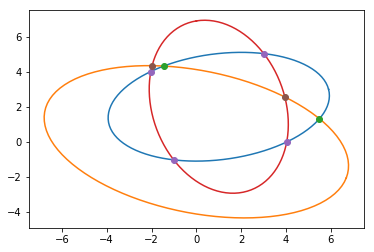

In [36]:
e1 = (5.0, 3.0, 1.0, 2.0, 0.2)
e2 = (7.0, 4.0, 0, 0, -0.3)
e3 = (5.0, 3.0, 1.0, 2.0, 0.2 + np.pi/2)
    
ellipse_plot(e1, e2)
ellipse_plot(e1, e3, False, True)
ellipse_plot(e2, e3, False, False)

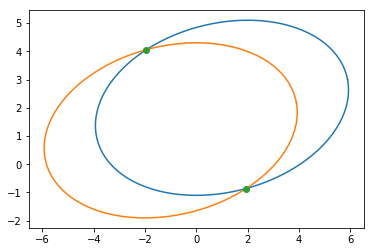

In [30]:
e1 = (5.0, 3.0, 1.0, 2.0, 0.2)
e2 = (5.0, 3.0, -1.0, 1.2, 0.2)
ellipse_plot(e1, e2)

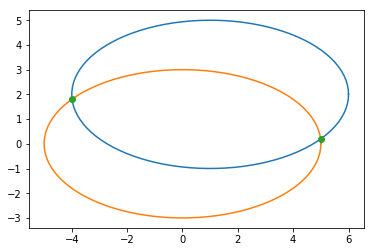

In [32]:
ellipse_plot((5.0, 3.0, 1.0, 2.0, 0.0), (5.0, 3.0, 0.0, 0.0, 0.0))

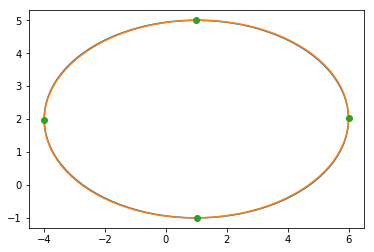

In [33]:
ellipse_plot((5.0, 3.0, 1.0, 2.0, 0.0), (5.0, 3.0, 1.0, 2.0, 0.01))

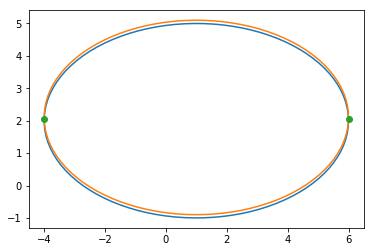

In [34]:
ellipse_plot((5.0, 3.0, 1.0, 2.0, 0.0), (5.0, 3.0, 1.0, 2.1, 0.0))